In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#pandas进阶操作
#透视表
titanic=sns.load_dataset("titanic")
pivot=pd.pivot_table(
    titanic,
    values="survived",#指定要计算的数值列
    index="class",#行索引
    columns="sex",#列索引
    aggfunc="mean",#平均数
     observed=True
)
print(pivot)

sex       female      male
class                     
First   0.968085  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


In [2]:
#时间序列基础
#创建时间序列
dates=pd.date_range("2025-08-24",periods=6,freq="D")
df=pd.DataFrame({"value":range(6)},index=dates)
print(df)

            value
2025-08-24      0
2025-08-25      1
2025-08-26      2
2025-08-27      3
2025-08-28      4
2025-08-29      5


In [5]:
#时间序列的基本操作
#按年/月重采样
df.resample("ME").sum()#按月求和
df.resample("YE").mean()#按月重采样
#时间筛选
df["2025-08-25":"2025-08-28"]
#提取时间属性
df.index.month
df['weekday'] = df.index.day_name()
print(df)


            value    weekday
2025-08-24      0     Sunday
2025-08-25      1     Monday
2025-08-26      2    Tuesday
2025-08-27      3  Wednesday
2025-08-28      4   Thursday
2025-08-29      5     Friday


原始时间序列：
            value    weekday  month
2025-08-24      0     Sunday      8
2025-08-25      1     Monday      8
2025-08-26      2    Tuesday      8
2025-08-27      3  Wednesday      8
2025-08-28      4   Thursday      8
2025-08-29      5     Friday      8
2025-08-30      6   Saturday      8
2025-08-31      7     Sunday      8
2025-09-01      8     Monday      9
2025-09-02      9    Tuesday      9
2025-09-03     10  Wednesday      9
2025-09-04     11   Thursday      9
2025-09-05     12     Friday      9
2025-09-06     13   Saturday      9

2025-08-25 到 2025-08-28 的数据：
            value    weekday  month
2025-08-25      1     Monday      8
2025-08-26      2    Tuesday      8
2025-08-27      3  Wednesday      8
2025-08-28      4   Thursday      8

每周求和：
2025-08-24     0
2025-08-31    28
2025-09-07    63
Freq: W-SUN, Name: value, dtype: int64

每月平均值：
2025-08-31     3.5
2025-09-30    10.5
Freq: ME, Name: value, dtype: float64


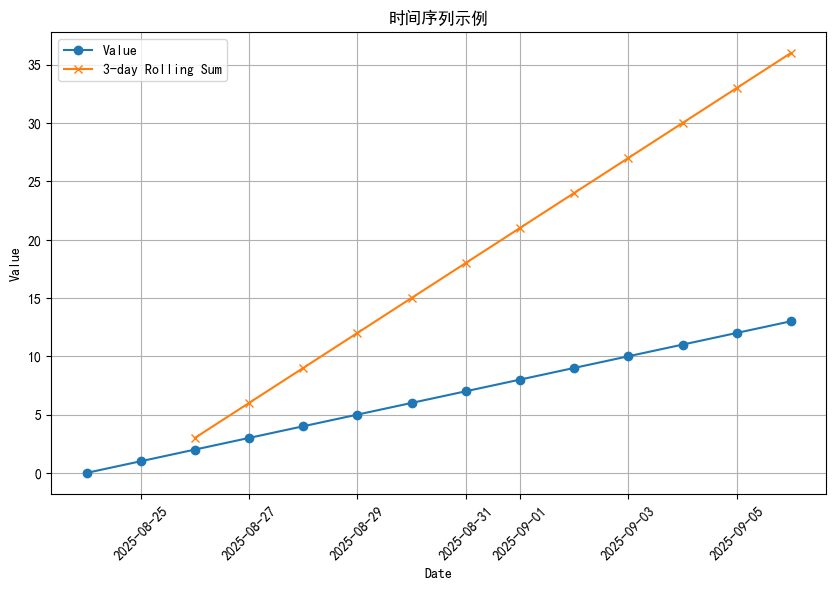

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体为 SimHei（黑体）
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False  # 避免负号显示为方块
# 1️⃣ 创建时间序列
dates = pd.date_range("2025-08-24", periods=14, freq="D")  # 两周的日期
df = pd.DataFrame({"value": range(14)}, index=dates)
df["weekday"] = df.index.day_name()  # 提取星期几
df["month"] = df.index.month         # 提取月份

print("原始时间序列：")
print(df)

# 2️⃣ 时间切片
print("\n2025-08-25 到 2025-08-28 的数据：")
print(df["2025-08-25":"2025-08-28"])

# 3️⃣ 按周和月重采样
weekly_sum = df["value"].resample("W").sum()  # 每周求和
monthly_mean = df["value"].resample("ME").mean()  # 每月求平均

print("\n每周求和：")
print(weekly_sum)
print("\n每月平均值：")
print(monthly_mean)

# 4️⃣ 滚动累计和（3天窗口）
df["rolling_sum"] = df["value"].rolling(3).sum()

# 5️⃣ 可视化
plt.figure(figsize=(10,6))
plt.plot(df.index, df["value"], marker='o', label="Value")
plt.plot(df.index, df["rolling_sum"], marker='x', label="3-day Rolling Sum")
plt.title("时间序列示例")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#apply函数与向量化操作对比
import pandas as pd
import numpy as np

# 模拟数据
df = pd.DataFrame({
    "Math": [95, 82, 70, 88, 60],
    "English": [92, 78, 85, 65, 80]
})

print("原始数据：")
print(df)
#用 apply(lambda row: …) 写法
def grade(row):
    if row["Math"] >= 90 and row["English"] >= 90:
        return "A"
    elif row["Math"] >= 80 or row["English"] >= 80:
        return "B"
    else:
        return "C"

df["Grade_apply"] = df.apply(lambda row: grade(row), axis=1)
print("\n用 apply 计算等级：")
print(df)
#尝试用向量化实现
df["Grade_vector"] = np.where(
    (df["Math"] >= 90) & (df["English"] >= 90), "A",
    np.where((df["Math"] >= 80) | (df["English"] >= 80), "B", "C")
)

print("\n用向量化计算等级：")
print(df)


原始数据：
   Math  English
0    95       92
1    82       78
2    70       85
3    88       65
4    60       80

用 apply 计算等级：
   Math  English Grade_apply
0    95       92           A
1    82       78           B
2    70       85           B
3    88       65           B
4    60       80           B

用向量化计算等级：
   Math  English Grade_apply Grade_vector
0    95       92           A            A
1    82       78           B            B
2    70       85           B            B
3    88       65           B            B
4    60       80           B            B


In [ ]:
| 方法              | 优点      | 缺点          |
| --------------- | ------- | ----------- |
| `apply(lambda)` | 逻辑直观，易读 | 慢，尤其大数据时    |
| 向量化             | 快，适合大数据 | 条件复杂时写起来不直观 |


#pandas apply / lambda 优化注意点
尽量向量化（vectorization）

pandas/NumPy 内部使用 C 语言批量计算，比 Python 循环快很多

示例：

# 慢
df["sum"] = df.apply(lambda row: row["A"] + row["B"], axis=1)

# 快（向量化）
df["sum"] = df["A"] + df["B"]


原则：能向量化就不要用 apply(lambda …)

避免逐行复杂操作

axis=1 的 apply 会对每一行调用函数，如果函数复杂，性能非常低

优化方法：

尽量使用列级操作 (axis=0)

使用 NumPy 内置函数 (np.where, np.log, np.sqrt 等)

条件判断优化

尽量用 np.where 或 Series.where 替代 lambda if/else

# 慢
df["grade"] = df.apply(lambda row: "A" if row["score"]>90 else "B", axis=1)

# 快
df["grade"] = np.where(df["score"]>90, "A", "B")


避免在 lambda 内创建大对象

不要在 lambda 内频繁创建 DataFrame、Series 或列表

会导致大量内存开销

对小数据可以灵活使用，对大数据慎用

小数据量用 apply(lambda …) 方便直观

大数据量要么向量化，要么考虑分块处理

使用 map / replace / astype 替代 apply

对单列映射或类型转换：

df["A"].map({1:"one", 2:"two"})        # 比 apply 快
df["B"].astype(float)                  # 类型转换


💡 总结

能向量化就向量化

复杂逻辑用 apply，但注意效率

条件判断用 np.where/Series.where

避免 lambda 内重复创建大对象